# 随机梯度下降法  Stochastic Gradient descent

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
m = int(1e5)

x = np.random.normal(size = m)
y = 4. * x + 3. + np.random.normal(0, 3, size = m)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [3]:
def J(x_b, y, theta):
    return np.sum((x_b.dot(theta) - y) ** 2) / len(x_b)

In [4]:
def delta_J(x_b, y, theta):
    return x_b.T.dot(x_b.dot(theta) - y) * 2. / len(y)

In [5]:
# 随机梯度下降法函数
def delta_J_SGD(x_b_i, y_i, theta):
    return x_b_i.T.dot(x_b_i.dot(theta) - y_i) * 2. / len(x_b_i)

In [6]:
def SGD(x_b, y, theta_init, n_iters, exp_nums):
    t0 = 5
    t1 = 50
    loss_his = []
    
    # 学习率定义
    def learn_rate(t):
        return t0 / (t + t1)
    
    theta = theta_init
    for cur_iter in range(n_iters):
        rand_i = [np.random.randint(len(x_b)) for i in range(exp_nums)]
#         rand_i = np.random.randint(len(x_b))
        grandient = delta_J_SGD(x_b[rand_i], y[rand_i], theta)
        theta -= learn_rate(cur_iter) * grandient
        loss_his.append(J(x_b, y, theta))
    return theta, loss_his
    

In [7]:
X = np.hstack([np.ones(shape= (len(x), 1)), x])
theta_init = np.zeros((X.shape[1], 1))
examples_nums = 10

In [8]:
%time theta, loss_his = SGD(X, y, theta_init, 100000, examples_nums)
theta

Wall time: 40.9 s


array([[2.99739936],
       [3.99402045]])

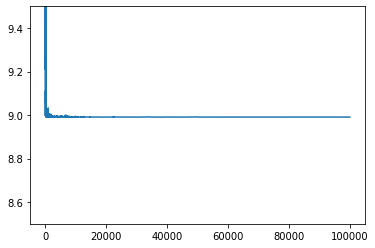

In [9]:
plt.plot(loss_his)
plt.ylim(8.5,9.5)
plt.show()

In [10]:
np.sqrt(loss_his[-1])

2.998471867255861